# <font color='green'><u>GRIP Internship</u></font>

# <font color='blue'><u>Prediction using Decision Tree Algorithm</u></font>

# By : Pankaj Kumar Barman

# Target : 
        ● Create the Decision Tree classifier and visualize it graphically.
        ● The purpose is if we feed any new data to this classifier, it would be able to
          predict the right class accordingly.

In [2]:
# importing the libraries
import numpy as np
import pandas as pd
pd.set_option("display.max_columns", 100)
import matplotlib.pyplot as plt
import seaborn as sns
sns.set()
import warnings
warnings.filterwarnings("ignore")

In [3]:
# importing the data set
from google.colab import files  
uploaded = files.upload()
#data = pd.read_csv("iris.csv")

Saving Iris.csv to Iris.csv


In [3]:

data = pd.read_csv("Iris.csv")
data.head()

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,1,5.1,3.5,1.4,0.2,Iris-setosa
1,2,4.9,3.0,1.4,0.2,Iris-setosa
2,3,4.7,3.2,1.3,0.2,Iris-setosa
3,4,4.6,3.1,1.5,0.2,Iris-setosa
4,5,5.0,3.6,1.4,0.2,Iris-setosa


In [4]:
data.tail()

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
145,146,6.7,3.0,5.2,2.3,Iris-virginica
146,147,6.3,2.5,5.0,1.9,Iris-virginica
147,148,6.5,3.0,5.2,2.0,Iris-virginica
148,149,6.2,3.4,5.4,2.3,Iris-virginica
149,150,5.9,3.0,5.1,1.8,Iris-virginica


In [5]:
df = data.copy()

In [6]:
# ---- DATA CHARACTERISTICS  ------------------------#
# Data Characteristics
def data_characteristics(df):
    # shape of the dataset
    print("Shape of the Dataset : {}".format(df.shape))
    print("Number of Columns in the Dataset : {}".format(df.shape[1]))
    print("Number of Rows in the Dataset : {}".format(df.shape[0]))
    print("-"*50)
    
    # Understanding the Number of Numeric and Categorical features in dataset
    numeric_features = df.select_dtypes(include = [np.number])
    categoric_features = df.select_dtypes(exclude = [np.number])
    print("Number of Numerical Features : {}".format(numeric_features.shape[1]))
    print("Number of Categorical Features : {}".format(categoric_features.shape[1]))
    print("-"*50)
    
    # Unique values
    print("No of unique values : {}".format(df.nunique()))
    print("-"*50)
    
    # Number of NOT NUll Values
    print("No of NON-NANS : {}".format(df.count()))
    print("-"*50)
    
    # Understanding the dataset
    print("Information of the Dataset : {}".format(df.info(verbose = False, memory_usage = "deep")))
    print("-"*50)
    
#------------------------------------------------------------------------------#

# dataset Characteristics
print(data_characteristics(df))

Shape of the Dataset : (150, 6)
Number of Columns in the Dataset : 6
Number of Rows in the Dataset : 150
--------------------------------------------------
Number of Numerical Features : 5
Number of Categorical Features : 1
--------------------------------------------------
No of unique values : Id               150
SepalLengthCm     35
SepalWidthCm      23
PetalLengthCm     43
PetalWidthCm      22
Species            3
dtype: int64
--------------------------------------------------
No of NON-NANS : Id               150
SepalLengthCm    150
SepalWidthCm     150
PetalLengthCm    150
PetalWidthCm     150
Species          150
dtype: int64
--------------------------------------------------
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Columns: 6 entries, Id to Species
dtypes: float64(4), int64(1), object(1)
memory usage: 16.3 KB
Information of the Dataset : None
--------------------------------------------------
None


In [7]:
# understand the statistics about data
df.describe()

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm
count,150.000000,150.000000,150.000000,150.000000,150.000000
mean,75.500000,5.843333,3.054000,3.758667,1.198667
std,43.445368,0.828066,0.433594,1.764420,0.763161
min,1.000000,4.300000,2.000000,1.000000,0.100000
25%,38.250000,5.100000,2.800000,1.600000,0.300000
50%,75.500000,5.800000,3.000000,4.350000,1.300000
75%,112.750000,6.400000,3.300000,5.100000,1.800000
max,150.000000,7.900000,4.400000,6.900000,2.500000


In [8]:
df.Species.unique()

array(['Iris-setosa', 'Iris-versicolor', 'Iris-virginica'], dtype=object)

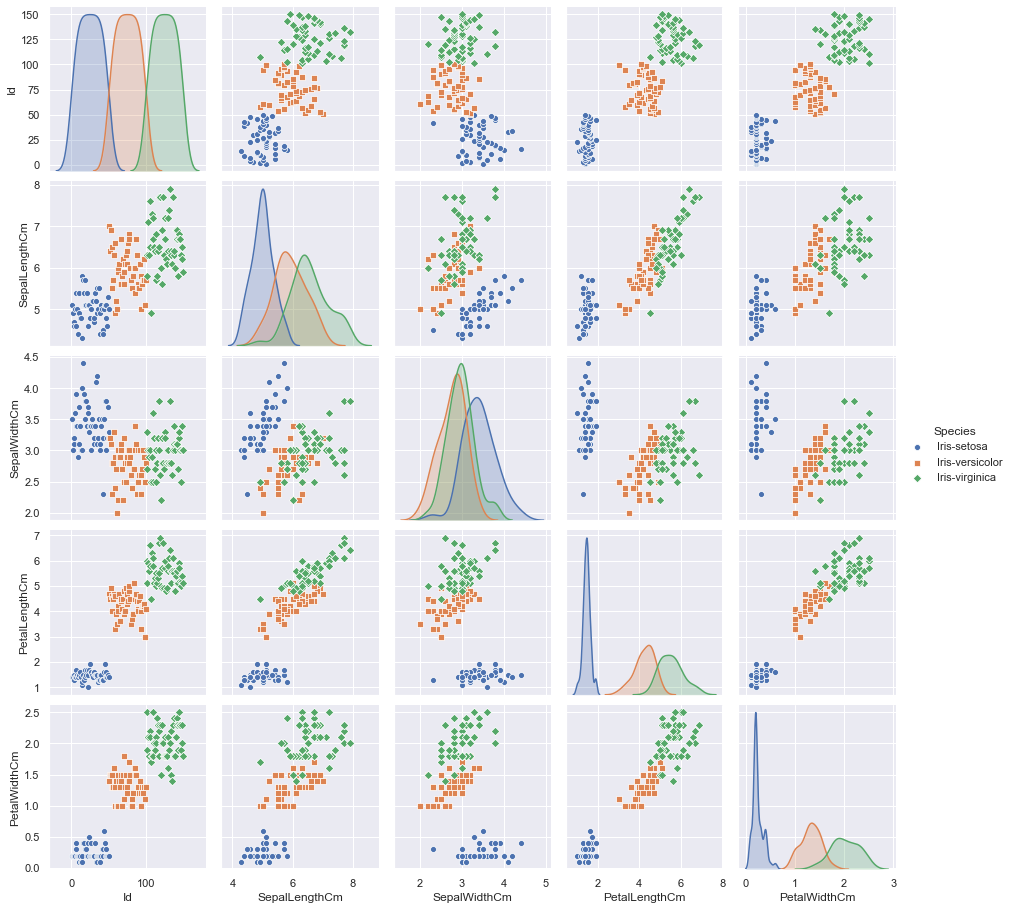

In [9]:
sns.pairplot(df,hue="Species",markers=["o", "s", "D"])

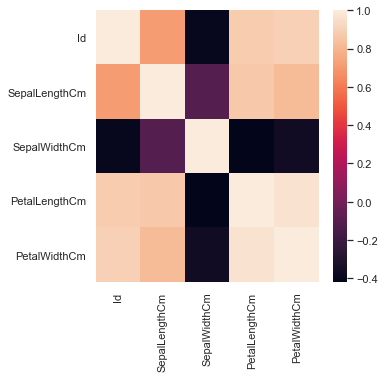

In [10]:
plt.figure(figsize=(5,5))
sns.heatmap(df.corr())

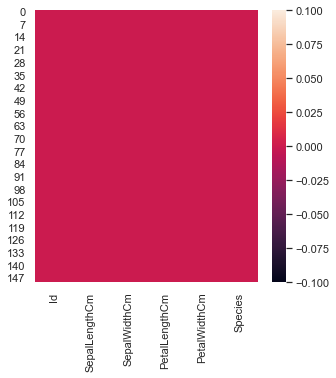

In [11]:
plt.figure(figsize=(5,5))
sns.heatmap(df.isnull())

### Perform feature Engineering

In [30]:
df2 = pd.read_csv("Iris.csv",index_col="Id")

In [31]:
df = df2.copy()

In [32]:
from sklearn.preprocessing import LabelEncoder

In [33]:
df.head()

,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
Id,,,,,
1,5.1,3.5,1.4,0.2,Iris-setosa
2,4.9,3.0,1.4,0.2,Iris-setosa
3,4.7,3.2,1.3,0.2,Iris-setosa
4,4.6,3.1,1.5,0.2,Iris-setosa
5,5.0,3.6,1.4,0.2,Iris-setosa


In [34]:
df["Species"] = LabelEncoder().fit_transform(df["Species"] )


In [35]:
df.head()

,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
Id,,,,,
1,5.1,3.5,1.4,0.2,0
2,4.9,3.0,1.4,0.2,0
3,4.7,3.2,1.3,0.2,0
4,4.6,3.1,1.5,0.2,0
5,5.0,3.6,1.4,0.2,0


In [36]:
data.Species.unique()

array(['Iris-setosa', 'Iris-versicolor', 'Iris-virginica'], dtype=object)

In [37]:
df.Species.unique()   # 0 : 'Iris-setosa', 1 : 'Iris-versicolor', 2 : 'Iris-virginica'

array([0, 1, 2])

In [38]:
# spliting the data set into dependent and independent features
X = df.iloc[:,:-1]
y = df.Species

In [39]:
X.head()

,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm
Id,,,,
1,5.1,3.5,1.4,0.2
2,4.9,3.0,1.4,0.2
3,4.7,3.2,1.3,0.2
4,4.6,3.1,1.5,0.2
5,5.0,3.6,1.4,0.2


In [40]:
from sklearn.model_selection import train_test_split
X_train,X_test,Y_train,Y_test = train_test_split(X,y,test_size = 0.2,random_state = 0)

In [41]:
# Defining the decision tree algorithm
from sklearn.tree import DecisionTreeClassifier
classifier=DecisionTreeClassifier()
classifier.fit(X_train,Y_train)

print('Decision Tree Classifer Created')

Decision Tree Classifer Created


In [42]:
# Import necessary libraries for graph viz
from sklearn.externals.six import StringIO  
from IPython.display import Image  
from sklearn.tree import export_graphviz
import pydotplus

In [43]:
col = X.columns

In [44]:
col

Index(['SepalLengthCm', 'SepalWidthCm', 'PetalLengthCm', 'PetalWidthCm'], dtype='object')

In [45]:
feature_names = X.columns[:5].tolist()
feature_names

['SepalLengthCm', 'SepalWidthCm', 'PetalLengthCm', 'PetalWidthCm']

In [46]:
# Visualize the graph
dot_data = StringIO()
export_graphviz(classifier, out_file=dot_data, feature_names=feature_names,  
                filled=True, rounded=True,
                special_characters=True)
graph = pydotplus.graph_from_dot_data(dot_data.getvalue())  

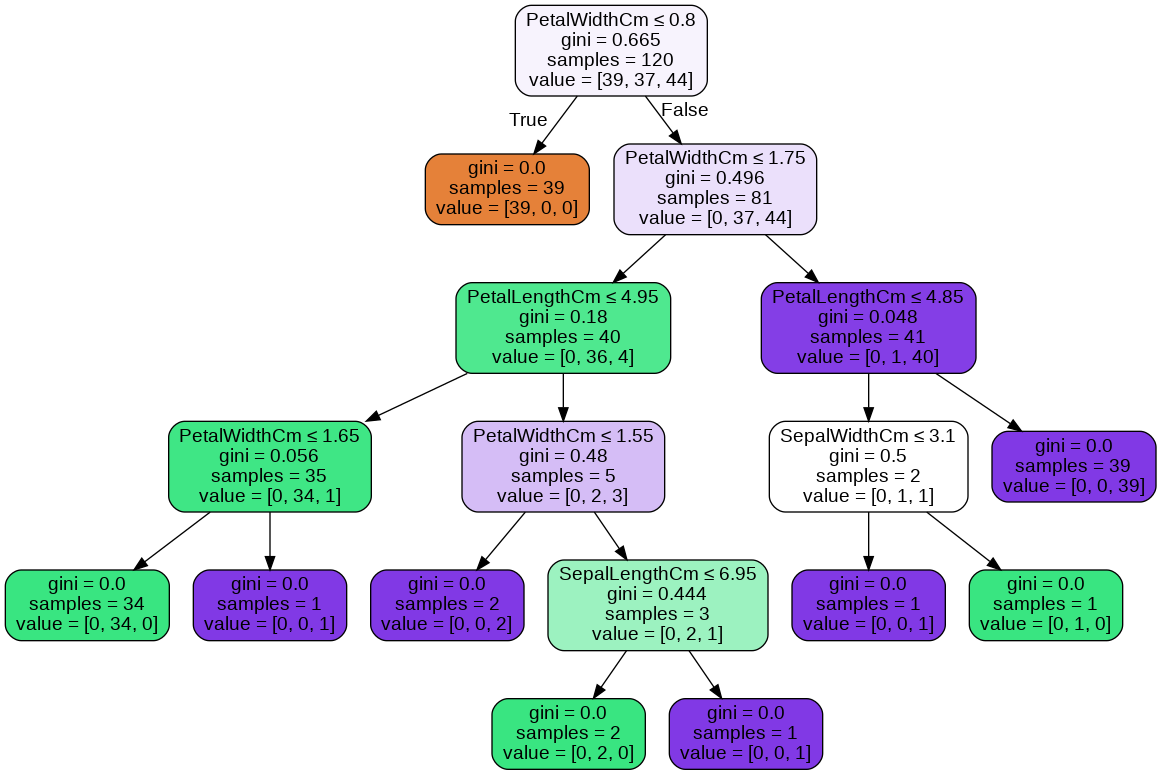

In [47]:
Image(graph.create_png())

In [48]:
y_pred = classifier.predict(X_test)

In [50]:
print("Train score:",classifier.score(X_train,Y_train))
print("Test Score:",classifier.score(X_test,Y_test))
pred = [[0,2.3,4.2,2.8]]
print("Prediction of {} is {}".format(pred,classifier.predict(pred)))

Train score: 1.0
Test Score: 1.0
Prediction of [[0, 2.3, 4.2, 2.8]] is [2]


In [51]:
pred = [[149,3.4,5.4,2.3]]
print("Prediction of {} is {}".format(pred,classifier.predict(pred)))

Prediction of [[149, 3.4, 5.4, 2.3]] is [2]


In [52]:
#Creating confusion matrix and report
from sklearn.metrics import classification_report, confusion_matrix
print(confusion_matrix(Y_test, y_pred))
print(classification_report(Y_test, y_pred))

[[11  0  0]
 [ 0 13  0]
 [ 0  0  6]]
              precision    recall  f1-score   support

           0       1.00      1.00      1.00        11
           1       1.00      1.00      1.00        13
           2       1.00      1.00      1.00         6

    accuracy                           1.00        30
   macro avg       1.00      1.00      1.00        30
weighted avg       1.00      1.00      1.00        30

